In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import preprocess as prep
import h5py
import numpy as np
import unicodedata
import json
import os
import pathlib
import cv2
import matplotlib.pyplot as plt
import imutils

In [5]:
def get_dataset(type):
    """Build tf.Dataset from HDF5 file, type is 'train' or 'test' or 'validation'"""
    data_path = os.path.join('..', 'data', "{}.hdf5".format(type))
    dataset = dict()
    with h5py.File(data_path, 'r') as f:
        dataset['image'] = f['image'][:]
        dataset['label'] = f['label'][:]
        
    size = len(dataset['label'])
    dataset['label'] = [x.decode() for x in dataset['label']]
    
    return dataset, size

dataset, size = get_dataset('train')
    

OSError: Unable to open file (unable to open file: name = '../data/train.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
type_ = 'test'
DATA_FOLDER = os.path.join('..', 'data', type_)

def get_label(type_):
    labels = json.load(open(os.path.join('..', 'data', '{}.json'.format(type_))))
    return labels

labels = get_label(type_)

all_image_paths = [str(item) for item in pathlib.Path(DATA_FOLDER).glob('*') if item.name in labels]
all_image_labels = [labels[pathlib.Path(path).name] for path in all_image_paths]
print(all_image_labels[:10], all_image_paths[:10])

['2094 Quốc lộ 1A, phường Tân Chánh Hiệp, Quận 12, TP Hồ Chí Minh', 'Thôn Cầu Trong, Xã Mỹ Thái, Huyện Lạng Giang, Bắc Giang', 'Lô D4 Khu Công nghiệp Trà Đa, Xã Trà Đa, Thành Phố Pleiku, Gia Lai', 'Thôn Đông Hải, Huyện Phú Quý, Bình Thuận', 'F2/25A10 ấp 6B, Xã Vĩnh Lộc A, Huyện Bình Chánh, TP Hồ Chí Minh', 'Xóm Giữa, Xã Thanh Liệt, Huyện Thanh Trì, Hà Nội', '37/11/24 đường Phú Định, Phường 16, Quận 8, TP Hồ Chí Minh', '298 Trường Sa, Phường 02, Quận Phú Nhuận, TP Hồ Chí Minh', '14 Thanh Tịnh, Phường Vỹ Dạ, Thành Phố Huế, Thừa Thiên - Huế', 'Số 283 Đường 30/4, Phường 3, Thành phố Sóc Trăng, Sóc Trăng'] ['../data/test/0327_tests.png', '../data/test/0030_tests.png', '../data/test/0086_tests.png', '../data/test/0372_tests.png', '../data/test/0223_tests.png', '../data/test/0348_tests.png', '../data/test/0500_tests.png', '../data/test/0508_tests.png', '../data/test/0043_tests.png', '../data/test/0329_tests.png']


In [7]:
import matplotlib.pyplot as plt

def preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.per_image_standardization(image)
    return image

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


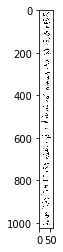

In [8]:
image = preprocess_image(all_image_paths[0])
plt.imshow(image[:,:,0], cmap='gray')

In [24]:
def get_label(type_):
    labels = json.load(open(os.path.join('..', 'data', '{}.json'.format(type_))))
    return labels
labels = get_label('train')
max([len(labels[item]) for item in labels])

69

In [25]:
# res = []
for item in labels:
    for c in labels[item]:
        if c not in res:
            res.append(c)
            
charset = ''.join(sorted(res))
print(charset, len(charset))

 #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩẫậắằẵặẹẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ 142


In [16]:
# charset_base = " #'()+,-./:0123456789ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstwuvxyzÂÊÔàáâãèéêẹìíòóôõùúýăĐđĩũƠơưạảấầẩẫậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"
len(charset_base)

142

In [ ]:
type = 'train'
DATA_TRAIN_FOLDER = os.path.join('..', 'data', type)
train_ds = tf.data.Dataset.list_files(os.path.join(DATA_TRAIN_FOLDER, '*'))
# test_ds = tf.data.Dataset.list_files(os.path.join(DATA_TEST_FOLDER, '*','*'))

for f in train_ds.take(5):
    print(f.numpy())

def get_label(type):
    labels = json.load(open(os.path.join('..', 'data', '{}.json'.format(type))))
    return labels

labels = get_label(type)

def preprocess(path):
    label = get_label(path)
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = (image*2) - 1  # normalize to [-1,1] range
    image = tf.image.per_image_standardization(image)
    return image, label

# def augmentation(image, label):
#     image = tf.image.random_brightness(image, .1)
#     image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     return image, label
    
def prepare_for_training(ds, cache=True, shuffle_buffer_size=100, augment=False):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)
    
    if augment:
        ds.map(augmentation, num_parallel_calls=AUTOTUNE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

# train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
# test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE)

# for image, label in train_ds.take(1):
#     print("Image shape: ", image.numpy().shape)
#     print("Label: ", label.numpy())

In [1]:
%load_ext tensorboard

In [3]:
%tensorboard --logdir logs

In [15]:
2560 /160

1024 / 128

8.0

(104, 1852)


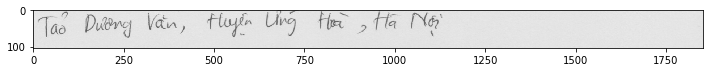

In [3]:
path = '../data/raw/0916_DataSamples_2/1455_samples.png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
print(image.shape)

def plot_image(image):
    plt.figure(figsize=(12,12))
    plt.imshow(imutils.opencv2matplotlib(image))
    plt.show()
    
plot_image(image)

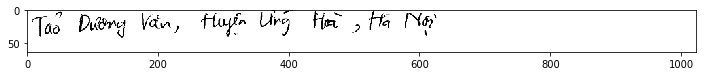

In [4]:
import preprocess as prep
import train
img_prep = prep.preprosess_raw(path, input_size=(1024, 64, 1))
plot_image(prep.adjust_to_see(img_prep))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1024 128


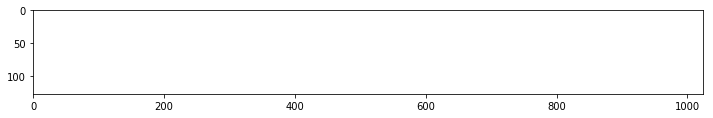

In [43]:
def cv2_augmentation(img,
                    rotation_range=3,
                    scale_range=0,
                    height_shift_range=5,
                    width_shift_range=5,
                    dilate_range=3,
                    erode_range=3):
    """Apply variations to a list of images (rotate, width and height shift, scale, erode, dilate)"""

    img = img.astype(np.float32)
    h, w = img.shape
    print(h, w)
    dilate_kernel = np.ones((int(np.random.uniform(1, dilate_range)),), np.uint8)
    erode_kernel = np.ones((int(np.random.uniform(1, erode_range)),), np.uint8)
    height_shift = np.random.uniform(-height_shift_range, height_shift_range + 10)
    rotation = np.random.uniform(-rotation_range, rotation_range)
    scale = np.random.uniform(1 - scale_range, 1)
    width_shift = np.random.uniform(-width_shift_range, width_shift_range)

    trans_map = np.float32([[1, 0, width_shift * w], [0, 1, height_shift * h]])
    rot_map = cv2.getRotationMatrix2D((w // 2, h // 2), rotation, scale)

    trans_map_aff = np.r_[trans_map, [[0, 0, 1]]]
    rot_map_aff = np.r_[rot_map, [[0, 0, 1]]]
    affine_mat = rot_map_aff.dot(trans_map_aff)[:2, :]

    img = cv2.warpAffine(img, affine_mat, (w, h), flags=cv2.INTER_NEAREST, borderValue=255)
    img = cv2.erode(img, erode_kernel, iterations=1)
    img = cv2.dilate(img, dilate_kernel, iterations=1)

    return img

img_aug = cv2_augmentation(img_prep)
plot_image(prep.adjust_to_see(img_aug))

In [5]:
train_ds, num_steps_train, _ = train.build_dataset('train', cache=True)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
for image_batch, label_batch in train_ds:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

In [ ]:
label_batch[0]

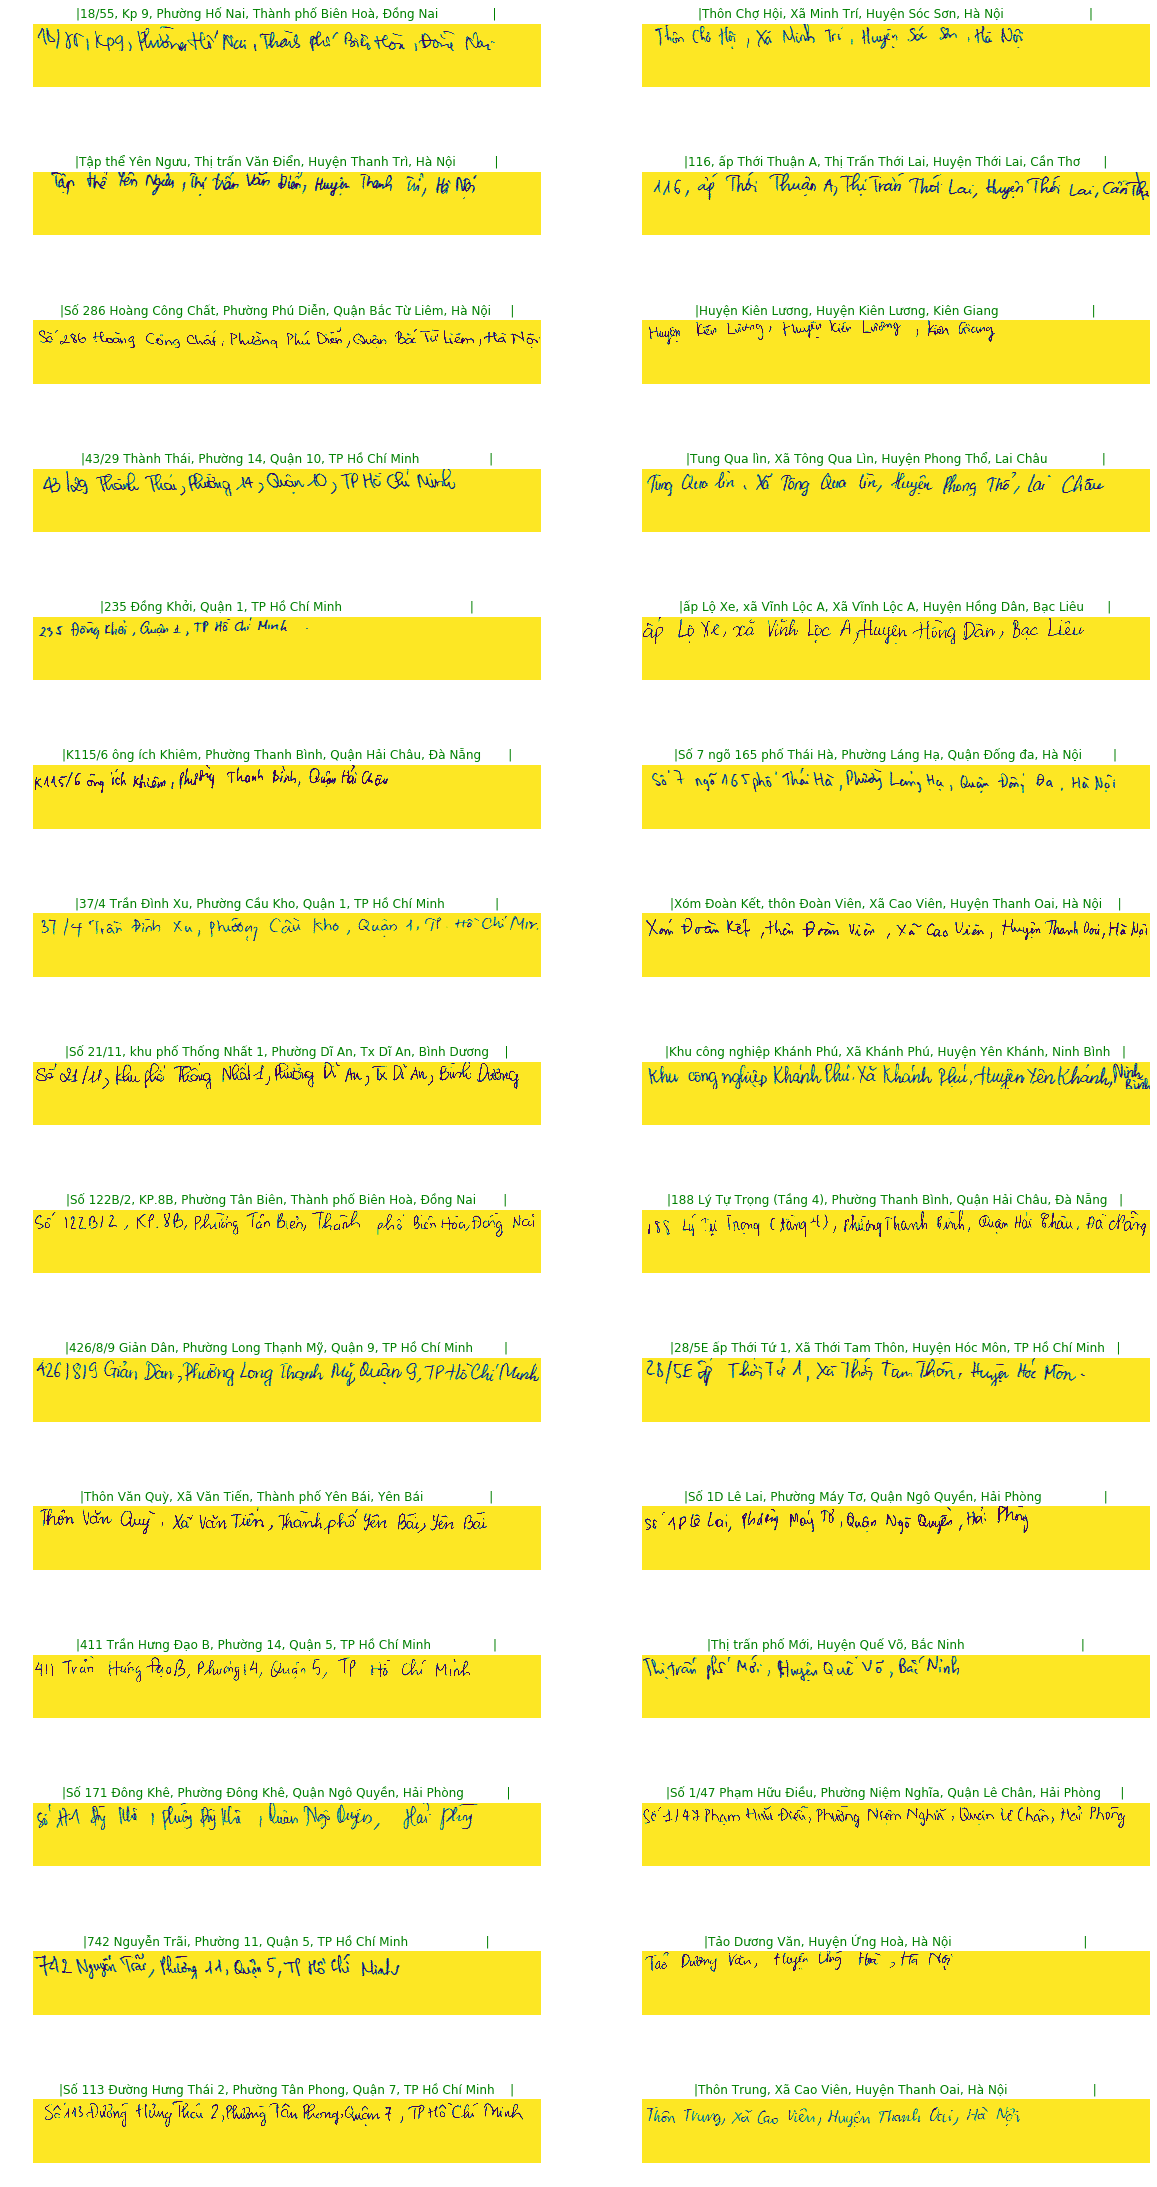

In [45]:
plt.figure(figsize=(20,40))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    image = image_batch[n][:,:,0].numpy()
    plt.subplot(15,2,n+1)
    plt.imshow(prep.adjust_to_see(image))
    color = "green"
    plt.title('|'+train.labels_to_text(label_batch[n])+'|', color=color)
    plt.axis('off')

In [7]:
0.001/2e-4

5.0

In [ ]:
[1, 2, 3]
[1, 0, 0]
